## Import Libraries

In [24]:
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as pt
from matplotlib import rcParams
import seaborn as sns

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
import sklearn.metrics as met
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Import Dataset

In [26]:
data=pd.read_csv('data.csv').drop(["id"],axis=1)


In [27]:
data.describe()

,age_days,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,53.339358,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,6.759594,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
#add a new feature (bmi) deriving from the existing features (height and weight)
data["bmi"] = data["weight"] / (data["height"]/100)**2

,age_days,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,18393,50.391781,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,20228,55.419178,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,18857,51.663014,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,17623,48.282192,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,17474,47.873973,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,52.712329,2,168,76.0,120,80,1,1,1,0,1,0,26.927438
69996,22601,61.920548,1,158,126.0,140,90,2,2,0,0,1,1,50.472681
69997,19066,52.235616,2,183,105.0,180,90,3,1,0,1,0,1,31.353579
69998,22431,61.454795,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


In [29]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age_days,70000.0,19468.865814,2467.251667,10798.000000,17664.000000,19703.000000,21327.000000,23713.000000
age_year,70000.0,53.339358,6.759594,29.583562,48.394521,53.980822,58.430137,64.967123
gender,70000.0,1.349571,0.476838,1.000000,1.000000,1.000000,2.000000,2.000000
height,70000.0,164.359229,8.210126,55.000000,159.000000,165.000000,170.000000,250.000000
weight,70000.0,74.205690,14.395757,10.000000,65.000000,72.000000,82.000000,200.000000
ap_hi,70000.0,128.817286,154.011419,-150.000000,120.000000,120.000000,140.000000,16020.000000
ap_lo,70000.0,96.630414,188.472530,-70.000000,80.000000,80.000000,90.000000,11000.000000
cholesterol,70000.0,1.366871,0.680250,1.000000,1.000000,1.000000,2.000000,3.000000
gluc,70000.0,1.226457,0.572270,1.000000,1.000000,1.000000,1.000000,3.000000
smoke,70000.0,0.088129,0.283484,0.000000,0.000000,0.000000,0.000000,1.000000


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age_days     70000 non-null  int64  
 1   age_year     70000 non-null  float64
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
 13  bmi          70000 non-null  float64
dtypes: float64(3), int64(11)
memory usage: 7.5 MB


<p>All Features re numerical and  11 of them are integers and 7 of them are decimal point numbers.</p>

## Visual Data Analysis

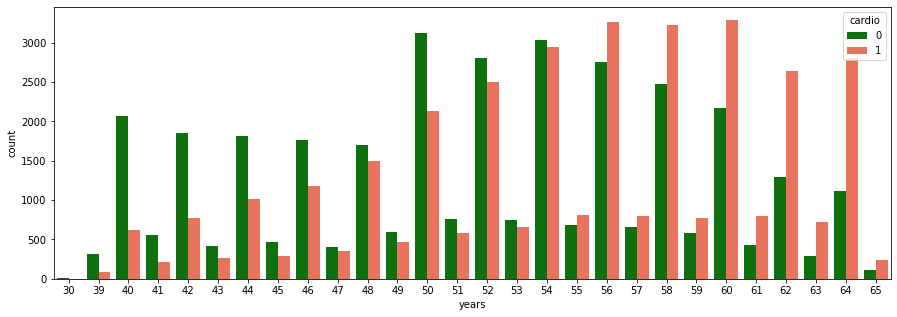

In [31]:
rcParams['figure.figsize'] = 15, 5
data['years'] = (data['age_year']).round().astype('int')
sns.countplot(x='years', hue='cardio', data = data, palette=["#008000", "#FF6347"]);

<p>According to the above visual analysis we can observed that people with the age range from 56 to 60 are more exposed to Cardiovascular Disease</p>

<p>Categorical data in this dataset are</p>
<ul>
    <li>gluc (glucose level)</li>
    <li>cholesterol</li>
    <li>smoke</li>
    <li>alco (alcoholic)</li>
    <li>active (physical activity)</li>
</ul>
<p>Let's take a look at visual analysis of categorical variable distribution</p>

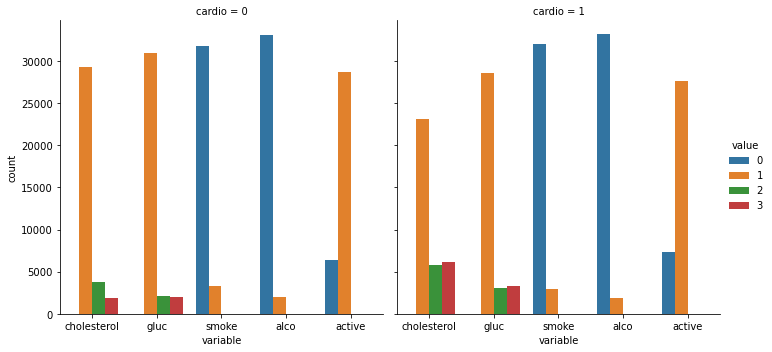

In [32]:
df_double = pd.melt(data, id_vars=['cardio'], value_vars=['cholesterol','gluc', 'smoke', 'alco', 'active'])
sns.catplot(x="variable", hue="value", col="cardio",data=df_double, kind="count");

<p>It can be clearly seen that  people suffuring from Cardiovascular Disease have higher cholesterol level and glucose level </p>

## Cleaning Data

In [33]:
#Checking fir any missing values or NA values in the dataset
data.isnull().values.any()

False

<p>As you can see in the description chart maximum height is 250cm and maximum weight is 200kg and the maximum BMI value which is derived from height and weight is 298 are irrelevant</p>

<p>So we can remove these irrelavant data and generalize it by removing outliers.</p>

In [34]:
data.drop(data[(data['height'] > data['height'].quantile(0.975)) | (data['height'] < data['height'].quantile(0.025))].index,inplace=True)
data.drop(data[(data['weight'] > data['weight'].quantile(0.975)) | (data['weight'] < data['weight'].quantile(0.025))].index,inplace=True)

In [35]:
data.describe()

,age_days,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,years
count,63866.000000,63866.000000,63866.000000,63866.000000,63866.000000,63866.000000,63866.000000,63866.000000,63866.000000,63866.000000,63866.000000,63866.000000,63866.000000,63866.000000,63866.000000
mean,19472.641171,53.349702,1.347806,164.497855,73.543564,128.815442,95.953308,1.359049,1.222654,0.086353,0.052876,0.803683,0.498199,27.232986,53.349450
std,2461.983315,6.745160,0.476278,6.862322,11.720806,160.987785,186.287388,0.674782,0.568902,0.280886,0.223788,0.397214,0.500001,4.446555,6.750712
min,10798.000000,29.583562,1.000000,150.000000,52.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,16.049383,30.000000
25%,17679.250000,48.436301,1.000000,160.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875433,48.000000
50%,19705.000000,53.986301,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.298488,54.000000
75%,21323.000000,58.419178,2.000000,169.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,29.823253,58.000000
max,23713.000000,64.967123,2.000000,180.000000,106.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,46.666667,65.000000


<p>Moreover Diastolic blood pressure(ap_lo) cannot be exceed Systolic blood pressure(ap_hi) because systolic pressure is the maximum preasure the heart exert while beating and the diastolic pressure is the amount of preasure in arteries  between beats</p>
<p>Also Numeric difference between Systolic blood pressure and Diastolic blood pressureis known as blood preasure and it cant be a negtive value</p>
<p>Considering above points we can remove outliers in order to get rid of inaccurate blood preasure data</p>

In [36]:
data.drop(data[(data['ap_hi'] > data['ap_hi'].quantile(0.975)) | (data['ap_hi'] < data['ap_hi'].quantile(0.025))].index,inplace=True)
data.drop(data[(data['ap_lo'] > data['ap_lo'].quantile(0.975)) | (data['ap_lo'] < data['ap_lo'].quantile(0.025))].index,inplace=True)

In [37]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age_days,60142.0,19468.719979,2460.510296,10798.000000,17677.250000,19705.000000,21321.000000,23713.000000
age_year,60142.0,53.338959,6.741124,29.583562,48.430822,53.986301,58.413699,64.967123
gender,60142.0,1.347311,0.476120,1.000000,1.000000,1.000000,2.000000,2.000000
height,60142.0,164.554854,6.830174,150.000000,160.000000,165.000000,169.000000,180.000000
weight,60142.0,73.426805,11.614806,52.000000,65.000000,72.000000,80.000000,106.000000
ap_hi,60142.0,125.770526,13.761847,100.000000,120.000000,120.000000,135.000000,163.000000
ap_lo,60142.0,81.046307,8.239157,60.000000,80.000000,80.000000,90.000000,100.000000
cholesterol,60142.0,1.350953,0.670076,1.000000,1.000000,1.000000,1.000000,3.000000
gluc,60142.0,1.220229,0.567607,1.000000,1.000000,1.000000,1.000000,3.000000
smoke,60142.0,0.085631,0.279820,0.000000,0.000000,0.000000,0.000000,1.000000


In [38]:
#standardization the dataset by removing the mean and scaling to unit varience
standardScaler = StandardScaler()
scale_columns = ['age_year', 'height', 'weight', 'ap_hi', 'ap_lo','bmi']
data[scale_columns] = standardScaler.fit_transform(data[scale_columns])
data

,age_days,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,years
0,18393,-0.437197,2,0.504405,-0.983822,-1.145970,-0.126993,1,1,0,0,1,0,-1.181393,50
1,20228,0.308589,1,-1.252519,0.996426,1.033989,1.086733,3,1,0,0,1,1,1.761144,55
2,18857,-0.248617,1,0.065174,-0.811626,0.307336,-1.340720,3,1,0,0,0,1,-0.831599,52
3,17623,-0.750143,2,0.650816,0.738133,1.760641,2.300460,1,1,0,0,1,1,0.349605,48
4,17474,-0.810700,1,-1.252519,-1.500408,-1.872622,-2.554446,1,1,0,0,0,0,-0.944353,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,19699,0.093591,1,1.090047,-0.295040,0.307336,1.086733,1,1,0,0,1,1,-0.796719,54
69994,21074,0.652423,1,0.065174,0.565937,1.760641,-0.126993,1,1,0,0,1,1,0.502691,58
69995,19240,-0.092957,2,0.504405,0.221546,-0.419317,-0.126993,1,1,1,0,1,0,-0.055213,53
69998,22431,1.203939,1,-0.227647,-0.122845,0.670662,-0.126993,1,2,0,0,0,1,-0.016205,61


## Spliit data 

In [39]:
Y = data['cardio']
X = data.drop(['cardio'], axis = 1)
x_training, x_testing, y_training, y_testing = train_test_split(X, Y, test_size = 0.33, random_state = 0)

## Applying KNN Algorithm 
<p>Since we do not know the best K value for the model at the moment we will give the K value as 1</p>

In [40]:
knn = KNeighborsClassifier(n_neighbors=5)

In [41]:
knn.fit(x_training,y_training)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [42]:
prediction = knn.predict(x_testing)
prediction

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

Text(396.6, 0.5, 'predicted class')

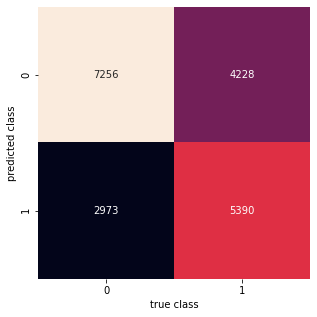

In [43]:
conmat=confusion_matrix(y_testing,prediction)
sns.heatmap(conmat.T, square=True, annot=True, fmt='d', cbar=False) 
pt.xlabel('true class') 
pt.ylabel('predicted class')

In [44]:
print(classification_report(y_testing,prediction)) 

              precision    recall  f1-score   support

           0       0.63      0.71      0.67     10229
           1       0.64      0.56      0.60      9618

    accuracy                           0.64     19847
   macro avg       0.64      0.63      0.63     19847
weighted avg       0.64      0.64      0.63     19847



## Choose the suitable K value
<br>
<p>In here we will use the elbow method to pick a good K Value by concentrating on both accuracy rate and error rate</p>

### Choose the K value based on accuracy rate

In [50]:
accuracy_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,data['cardio'],cv=10)
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'Accuracy Rate')

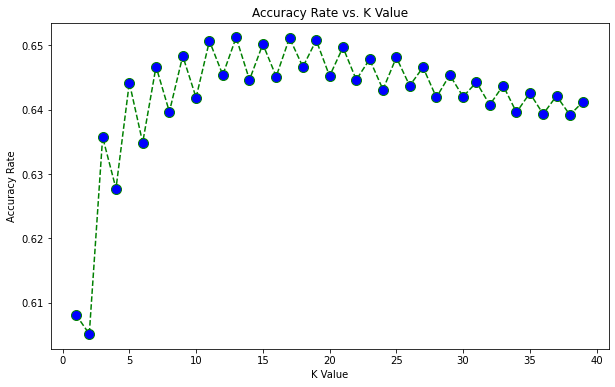

In [51]:
pt.figure(figsize=(10,6))
pt.plot(range(1,40),accuracy_rate,color='green', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
pt.title('Accuracy Rate vs. K Value')
pt.xlabel('K Value')
pt.ylabel('Accuracy Rate')

<p>According to the above graph (K value vs Accuracy Rate) we can see that after around K>5 the accuracy rate will increase</p>

### Choose the K value based on error rate

In [52]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,data['cardio'],cv=10)
    error_rate.append(1-score.mean())

Text(0, 0.5, 'Error Rate')

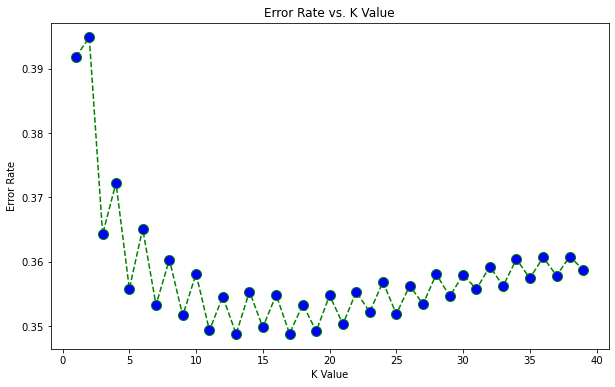

In [53]:
pt.figure(figsize=(10,6))
pt.plot(range(1,40),error_rate,color='green', linestyle='dashed', marker='o',
        markerfacecolor='blue', markersize=10)
pt.title('Error Rate vs. K Value')
pt.xlabel('K Value')
pt.ylabel('Error Rate')

<p>According to the above graph (K value vs Error Rate) we can see that that after around K>5 the error rate will increase</p>
<p>By considering the elbow method conducted for both error rate and accuracy rate we will choose <b>5 as the best k value</b></p>
<p>So retrain the model with the best K value and re-do the classification report and the confusion matrix</p><br>

In [54]:
#for K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(x_training,y_training)
prediction = knn.predict(x_testing)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_testing,prediction))
print('\n')
print(classification_report(y_testing,prediction))
accuracyscore=met.accuracy_score(y_testing, prediction)*100
print('\n')
print('Accuracy score given for test data:',str(accuracyscore))

WITH K=1


[[6559 3670]
 [4161 5457]]


              precision    recall  f1-score   support

           0       0.61      0.64      0.63     10229
           1       0.60      0.57      0.58      9618

    accuracy                           0.61     19847
   macro avg       0.60      0.60      0.60     19847
weighted avg       0.61      0.61      0.60     19847



Accuracy score given for test data: 60.543155136796486


In [55]:
#for K=5
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(x_training,y_training)
prediction = knn.predict(x_testing)

print('WITH K=14')
print('\n')
print(confusion_matrix(y_testing,prediction))
print('\n')
print(classification_report(y_testing,prediction))
accuracyscore=met.accuracy_score(y_testing, prediction)*100
print('\n')
print('Accuracy score given for test data:',str(accuracyscore))

WITH K=14


[[7256 2973]
 [4228 5390]]


              precision    recall  f1-score   support

           0       0.63      0.71      0.67     10229
           1       0.64      0.56      0.60      9618

    accuracy                           0.64     19847
   macro avg       0.64      0.63      0.63     19847
weighted avg       0.64      0.64      0.63     19847



Accuracy score given for test data: 63.71743840378898
